## Preprocessing: Going to the past
Let's take 20% of our pictures and make them black and white

In [4]:
import os
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras_cv
import cv2
import tensorflow as tf
from keras_cv import layers as cv_layers
from tqdm import tqdm

In [2]:
dataset_filename = 'train_aug_cleaned_training_set.npz'

if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    directory_dataset = '/kaggle/input/blood-cells'
else:
    directory_dataset = '../data'
    if not os.path.exists(directory_dataset):
        os.makedirs(directory_dataset)
    if not os.path.exists(f'{directory_dataset}/{dataset_filename}'):
        url = "https://www.kaggle.com/datasets/camilosinning/blood-cells/download/d8yi67rTZ6HYsohjT9GN%2Fversions%2FFwagJNSFnqnnOYT5wDmO%2Ffiles%2Ftraining_set.npz?datasetVersionNumber=1"
        urllib.request.urlretrieve(url, directory_dataset)

In [3]:
dataset_path = f'{directory_dataset}/{dataset_filename}'

dataset = np.load(dataset_path,allow_pickle=True)
X = dataset['images']
y = dataset['labels']

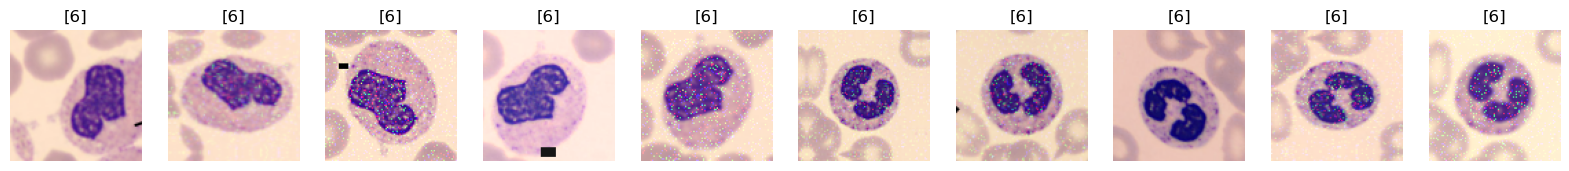

In [4]:
# See the first 10 images
fig, axes = plt.subplots(1, 10, figsize=(20, 5))
for i in range(10):
    axes[i].imshow(X[i])
    axes[i].axis('off')
    axes[i].set_title(y[i])
plt.show()

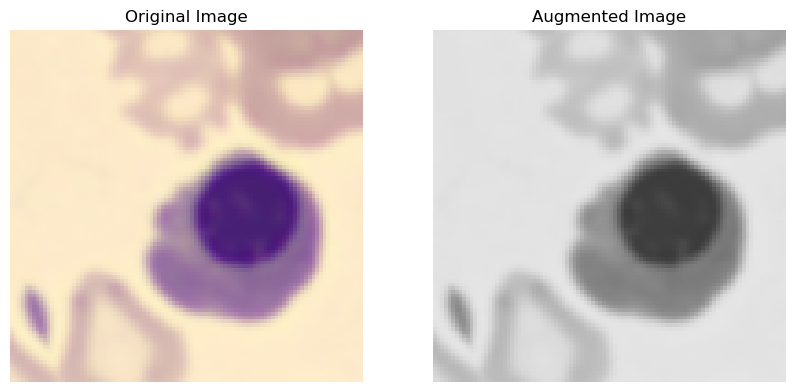

Original dataset size: 58055
Augmented dataset size: 69666


In [ ]:
# Calculate the number of images to augment
num_images_to_augment = int(0.2 * len(X))

# Randomly select indices for the images to augment
indices_to_augment = np.random.choice(len(X), num_images_to_augment, replace=False)

# Convert selected images to black and white and add them to the dataset
X_augmented = []
y_augmented = []

isFirst = True
for idx in indices_to_augment:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(X[idx], cv2.COLOR_BGR2GRAY)
    # Convert grayscale image back to 3 channels
    gray_image_3ch = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
    # Append the augmented image and its label to the new lists

    if isFirst:
        isFirst = False
        # Plot one of the original and augmented images for comparison
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Original image
        axes[0].imshow(X[idx])
        axes[0].axis('off')
        axes[0].set_title(f'Original Image')

        # Augmented image
        axes[1].imshow(gray_image_3ch)
        axes[1].axis('off')
        axes[1].set_title(f'Augmented Image')

        plt.show()

    X_augmented.append(gray_image_3ch)
    y_augmented.append(y[idx])

# Convert lists to numpy arrays
X_augmented = np.array(X_augmented)
y_augmented = np.array(y_augmented)

# Add the augmented images to the original dataset
X = np.concatenate((X, X_augmented), axis=0)
y = np.concatenate((y, y_augmented), axis=0)

print(f"Original dataset size: {len(X) - len(X_augmented)}")
print(f"Augmented dataset size: {len(X)}")

In [6]:
# Save the balanced dataset
np.savez_compressed(f'{directory_dataset}/bw_train_aug_cleaned_training_set.npz', images=X, labels=y)

print(f"Balanced dataset saved to {directory_dataset}/bw_train_aug_cleaned_training_set.npz")

Balanced dataset saved to ../data/bw_train_aug_cleaned_training_set.npz


## Now let's make all of them B/W

### 50\%

In [5]:
dataset_filename = 'val_cleaned_training_set.npz'

if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    directory_dataset = '/kaggle/input/blood-cells'
else:
    directory_dataset = '../data'
    if not os.path.exists(directory_dataset):
        os.makedirs(directory_dataset)
    if not os.path.exists(f'{directory_dataset}/{dataset_filename}'):
        url = "https://www.kaggle.com/datasets/camilosinning/blood-cells/download/d8yi67rTZ6HYsohjT9GN%2Fversions%2FFwagJNSFnqnnOYT5wDmO%2Ffiles%2Ftraining_set.npz?datasetVersionNumber=1"
        urllib.request.urlretrieve(url, directory_dataset)

In [6]:
dataset_path = f'{directory_dataset}/{dataset_filename}'

dataset = np.load(dataset_path,allow_pickle=True)
X_val = dataset['images']
y_val = dataset['labels']

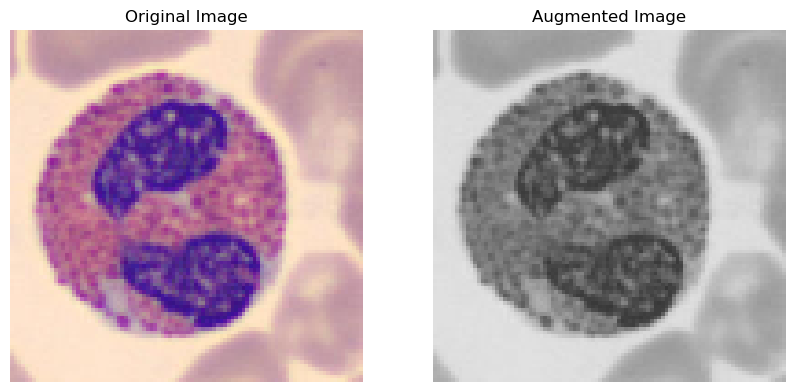

Original dataset size: 1794
Augmented dataset size: 2691


In [7]:
# Calculate the number of images to augment
num_images_to_augment = int(0.5 * len(X_val))

# Randomly select indices for the images to augment
indices_to_augment = np.random.choice(len(X_val), num_images_to_augment, replace=False)

# Convert selected images to black and white and add them to the dataset
X_val_augmented = []
y_val_augmented = []

isFirst = True
for idx in indices_to_augment:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(X_val[idx], cv2.COLOR_BGR2GRAY)
    # Convert grayscale image back to 3 channels
    gray_image_3ch = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
    # Append the augmented image and its label to the new lists

    if isFirst:
        isFirst = False
        # Plot one of the original and augmented images for comparison
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Original image
        axes[0].imshow(X_val[idx])
        axes[0].axis('off')
        axes[0].set_title(f'Original Image')

        # Augmented image
        axes[1].imshow(gray_image_3ch)
        axes[1].axis('off')
        axes[1].set_title(f'Augmented Image')

        plt.show()

    X_val_augmented.append(gray_image_3ch)
    y_val_augmented.append(y_val[idx])

# Convert lists to numpy arrays
X_val_augmented = np.array(X_val_augmented)
y_val_augmented = np.array(y_val_augmented)

# Add the augmented images to the original dataset
X_val = np.concatenate((X_val, X_val_augmented), axis=0)
y_val = np.concatenate((y_val, y_val_augmented), axis=0)

print(f"Original dataset size: {len(X_val) - len(X_val_augmented)}")
print(f"Augmented dataset size: {len(X_val)}")

In [5]:
# Save the balanced dataset
np.savez_compressed(f'{directory_dataset}/50_bw_val_aug_cleaned_training_set.npz', images=X_val, labels=y_val)

print(f"Balanced dataset saved to {directory_dataset}/50_bw_val_aug_cleaned_training_set.npz")

Balanced dataset saved to ../data/50_bw_val_aug_cleaned_training_set.npz


### Now with replacement

In [8]:
dataset_filename = 'val_cleaned_training_set.npz'

if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    directory_dataset = '/kaggle/input/blood-cells'
else:
    directory_dataset = '../data'
    if not os.path.exists(directory_dataset):
        os.makedirs(directory_dataset)
    if not os.path.exists(f'{directory_dataset}/{dataset_filename}'):
        url = "https://www.kaggle.com/datasets/camilosinning/blood-cells/download/d8yi67rTZ6HYsohjT9GN%2Fversions%2FFwagJNSFnqnnOYT5wDmO%2Ffiles%2Ftraining_set.npz?datasetVersionNumber=1"
        urllib.request.urlretrieve(url, directory_dataset)

In [9]:
dataset_path = f'{directory_dataset}/{dataset_filename}'

dataset = np.load(dataset_path,allow_pickle=True)
X_val = dataset['images']
y_val = dataset['labels']

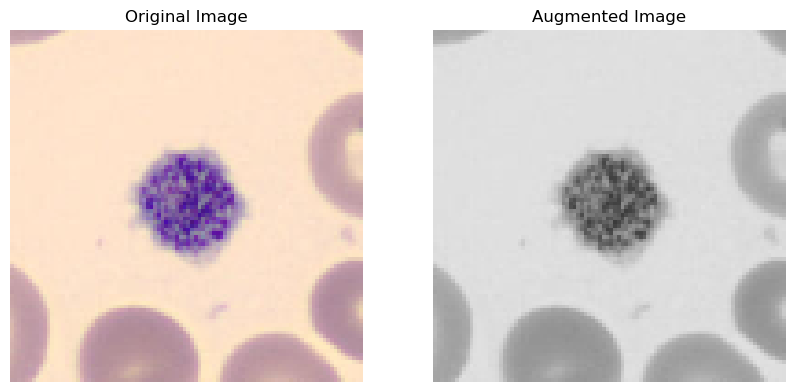

Number of images replaced with black and white versions: 897


In [10]:
# Calculate the number of images to augment
num_images_to_augment = int(0.5 * len(X_val))

# Randomly select indices for the images to augment
indices_to_augment = np.random.choice(len(X_val), num_images_to_augment, replace=False)

isFirst = True
for idx in indices_to_augment:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(X_val[idx], cv2.COLOR_BGR2GRAY)
    # Convert grayscale image back to 3 channels
    gray_image_3ch = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
    
    if isFirst:
        isFirst = False
        # Plot one of the original and augmented images for comparison
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Original image
        axes[0].imshow(X_val[idx])
        axes[0].axis('off')
        axes[0].set_title(f'Original Image')

        # Augmented image
        axes[1].imshow(gray_image_3ch)
        axes[1].axis('off')
        axes[1].set_title(f'Augmented Image')

        plt.show()

    # Replace the original image with the augmented image
    X_val[idx] = gray_image_3ch

print(f"Number of images replaced with black and white versions: {num_images_to_augment}")

In [11]:
# Save the balanced dataset
np.savez_compressed(f'{directory_dataset}/50_bw_val_cleaned_training_set.npz', images=X_val, labels=y_val)

print(f"Balanced dataset saved to {directory_dataset}/50_bw_val_cleaned_training_set.npz")

Balanced dataset saved to ../data/50_bw_val_cleaned_training_set.npz


### Just make the whole thing B/W

In [12]:
dataset_filename = 'val_cleaned_training_set.npz'

if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    directory_dataset = '/kaggle/input/blood-cells'
else:
    directory_dataset = '../data'
    if not os.path.exists(directory_dataset):
        os.makedirs(directory_dataset)
    if not os.path.exists(f'{directory_dataset}/{dataset_filename}'):
        url = "https://www.kaggle.com/datasets/camilosinning/blood-cells/download/d8yi67rTZ6HYsohjT9GN%2Fversions%2FFwagJNSFnqnnOYT5wDmO%2Ffiles%2Ftraining_set.npz?datasetVersionNumber=1"
        urllib.request.urlretrieve(url, directory_dataset)

In [13]:
dataset_path = f'{directory_dataset}/{dataset_filename}'

dataset = np.load(dataset_path,allow_pickle=True)
X_val = dataset['images']
y_val = dataset['labels']

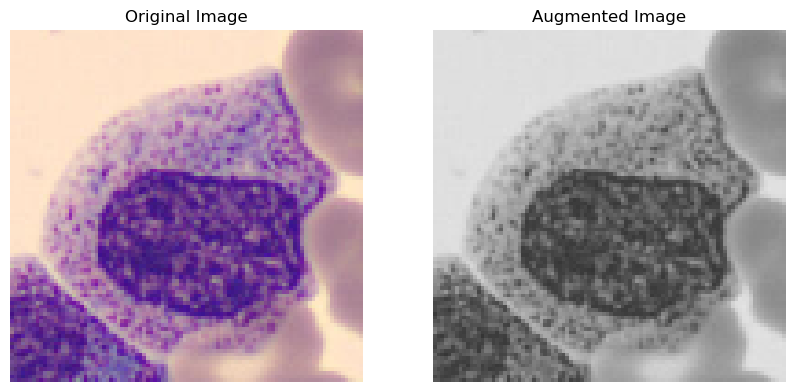

Original dataset size: 1794
Augmented dataset size: 3588


In [14]:
# Calculate the number of images to augment
num_images_to_augment = int(len(X_val))

# Randomly select indices for the images to augment
indices_to_augment = np.random.choice(len(X_val), num_images_to_augment, replace=False)

# Convert selected images to black and white and add them to the dataset
X_val_augmented = []
y_val_augmented = []

isFirst = True
for idx in indices_to_augment:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(X_val[idx], cv2.COLOR_BGR2GRAY)
    # Convert grayscale image back to 3 channels
    gray_image_3ch = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
    # Append the augmented image and its label to the new lists

    if isFirst:
        isFirst = False
        # Plot one of the original and augmented images for comparison
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Original image
        axes[0].imshow(X_val[idx])
        axes[0].axis('off')
        axes[0].set_title(f'Original Image')

        # Augmented image
        axes[1].imshow(gray_image_3ch)
        axes[1].axis('off')
        axes[1].set_title(f'Augmented Image')

        plt.show()

    X_val_augmented.append(gray_image_3ch)
    y_val_augmented.append(y_val[idx])

# Convert lists to numpy arrays
X_val_augmented = np.array(X_val_augmented)
y_val_augmented = np.array(y_val_augmented)

# Add the augmented images to the original dataset
X_val = np.concatenate((X_val, X_val_augmented), axis=0)
y_val = np.concatenate((y_val, y_val_augmented), axis=0)

print(f"Original dataset size: {len(X_val) - len(X_val_augmented)}")
print(f"Augmented dataset size: {len(X_val)}")

In [15]:
# Save the balanced dataset
np.savez_compressed(f'{directory_dataset}/100_bw_val_aug_cleaned_training_set.npz', images=X_val, labels=y_val)

print(f"Balanced dataset saved to {directory_dataset}/100_bw_val_aug_cleaned_training_set.npz")

Balanced dataset saved to ../data/100_bw_val_aug_cleaned_training_set.npz


### Now with replacement

In [16]:
dataset_filename = 'val_cleaned_training_set.npz'

if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    directory_dataset = '/kaggle/input/blood-cells'
else:
    directory_dataset = '../data'
    if not os.path.exists(directory_dataset):
        os.makedirs(directory_dataset)
    if not os.path.exists(f'{directory_dataset}/{dataset_filename}'):
        url = "https://www.kaggle.com/datasets/camilosinning/blood-cells/download/d8yi67rTZ6HYsohjT9GN%2Fversions%2FFwagJNSFnqnnOYT5wDmO%2Ffiles%2Ftraining_set.npz?datasetVersionNumber=1"
        urllib.request.urlretrieve(url, directory_dataset)

In [17]:
dataset_path = f'{directory_dataset}/{dataset_filename}'

dataset = np.load(dataset_path,allow_pickle=True)
X_val = dataset['images']
y_val = dataset['labels']

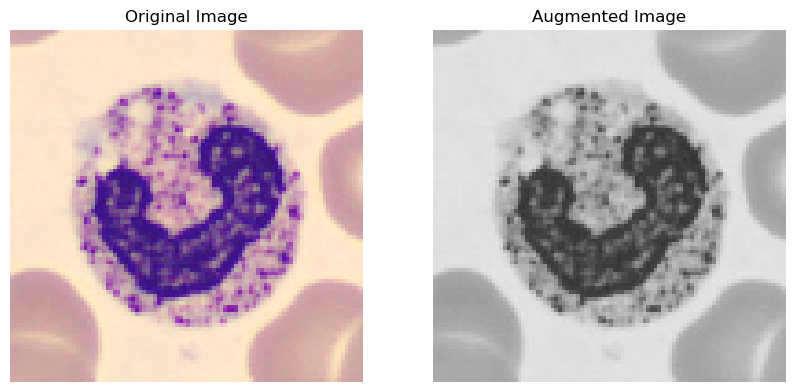

Number of images replaced with black and white versions: 1794


In [18]:
# Calculate the number of images to augment
num_images_to_augment = int(len(X_val))

# Randomly select indices for the images to augment
indices_to_augment = np.random.choice(len(X_val), num_images_to_augment, replace=False)

isFirst = True
for idx in indices_to_augment:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(X_val[idx], cv2.COLOR_BGR2GRAY)
    # Convert grayscale image back to 3 channels
    gray_image_3ch = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
    
    if isFirst:
        isFirst = False
        # Plot one of the original and augmented images for comparison
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        # Original image
        axes[0].imshow(X_val[idx])
        axes[0].axis('off')
        axes[0].set_title(f'Original Image')

        # Augmented image
        axes[1].imshow(gray_image_3ch)
        axes[1].axis('off')
        axes[1].set_title(f'Augmented Image')

        plt.show()

    # Replace the original image with the augmented image
    X_val[idx] = gray_image_3ch

print(f"Number of images replaced with black and white versions: {num_images_to_augment}")

In [19]:
# Save the balanced dataset
np.savez_compressed(f'{directory_dataset}/100_bw_val_cleaned_training_set.npz', images=X_val, labels=y_val)

print(f"Balanced dataset saved to {directory_dataset}/100_bw_val_cleaned_training_set.npz")

Balanced dataset saved to ../data/100_bw_val_cleaned_training_set.npz
